# SVM Property Address Classifier - Testing & Inference

## Objective
This notebook demonstrates:
- Loading the trained SVM classifier from saved model
- Performing inference on new addresses
- Analyzing model performance on validation set
- Error analysis and insights
- Real-world testing examples

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import cloudpickle
import warnings
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    f1_score, precision_score, recall_score
)
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

print("Libraries imported successfully")

Libraries imported successfully


## Load Trained Model

Loading the SVM classifier pipeline that was trained and saved in the training notebook.

In [3]:
# Load the trained pipeline
model_path = "../best_models/svm_classifier_v2.pkl"

print(f"Loading model from: {model_path}")
with open(model_path, 'rb') as f:
    pipeline = cloudpickle.load(f)

print("\n Model loaded successfully!")
print(f"\nPipeline structure:")
print(pipeline)

Loading model from: ../best_models/svm_classifier_v2.pkl

 Model loaded successfully!

Pipeline structure:
Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('word',
                                                 TfidfVectorizer(max_features=5000,
                                                                 min_df=2,
                                                                 ngram_range=(1,
                                                                              3),
                                                                 preprocessor=<function preprocess_address at 0x106a92d40>,
                                                                 sublinear_tf=True)),
                                                ('char',
                                                 TfidfVectorizer(analyzer='char',
                                                                 max_features=3000,
                                                    

## Load Validation Data

Loading the validation dataset to test the model's performance.

In [4]:
# Load validation data
val_df = pd.read_excel("../data/Validation.xlsx")

X_val = val_df["property_address"].values
y_val = val_df["categories"].values

print(f"Validation samples: {len(val_df)}")
print(f"\nClass distribution:")
print(val_df["categories"].value_counts())

Validation samples: 2681

Class distribution:
categories
flat               970
houseorplot        802
others             359
commercial unit    290
landparcel         260
Name: count, dtype: int64


## Make Predictions on Validation Set

In [6]:
# Generate predictions
print("Generating predictions...")
y_pred = pipeline.predict(X_val)

print("\nPredictions complete!")
print(f"Total predictions: {len(y_pred)}")

Generating predictions...

Predictions complete!
Total predictions: 2681


## Model Performance Evaluation

In [7]:
# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
macro_f1 = f1_score(y_val, y_pred, average='macro')
weighted_f1 = f1_score(y_val, y_pred, average='weighted')
macro_precision = precision_score(y_val, y_pred, average='macro')
macro_recall = recall_score(y_val, y_pred, average='macro')

print("=" * 60)
print("MODEL PERFORMANCE ON VALIDATION SET")
print("=" * 60)
print(f"Accuracy:          {accuracy*100:.2f}%")
print(f"Macro F1:          {macro_f1:.4f}")
print(f"Weighted F1:       {weighted_f1:.4f}")
print(f"Macro Precision:   {macro_precision:.4f}")
print(f"Macro Recall:      {macro_recall:.4f}")
print("=" * 60)

print("\nDETAILED CLASSIFICATION REPORT:")
print(classification_report(y_val, y_pred, digits=4))

MODEL PERFORMANCE ON VALIDATION SET
Accuracy:          91.98%
Macro F1:          0.9075
Weighted F1:       0.9204
Macro Precision:   0.9036
Macro Recall:      0.9122

DETAILED CLASSIFICATION REPORT:
                 precision    recall  f1-score   support

commercial unit     0.9689    0.9655    0.9672       290
           flat     0.9744    0.9423    0.9581       970
    houseorplot     0.9102    0.9102    0.9102       802
     landparcel     0.8365    0.8462    0.8413       260
         others     0.8278    0.8969    0.8610       359

       accuracy                         0.9198      2681
      macro avg     0.9036    0.9122    0.9075      2681
   weighted avg     0.9216    0.9198    0.9204      2681



## Confusion Matrix Visualization

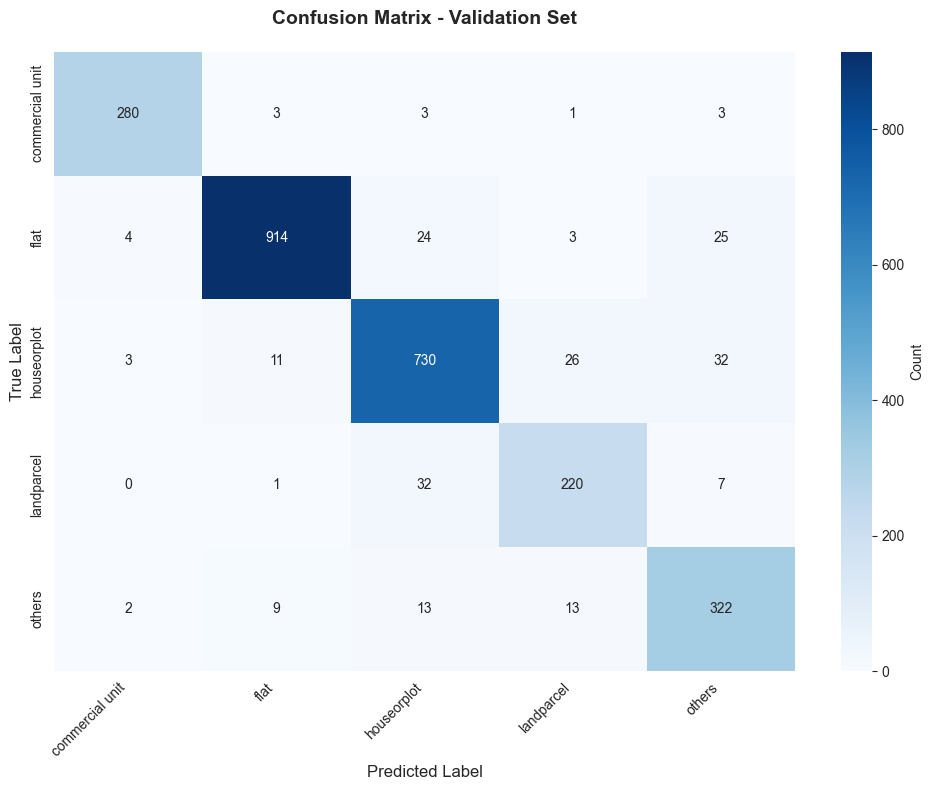


Per-Class Accuracy:
commercial unit     : 96.55% (280/290)
flat                : 94.23% (914/970)
houseorplot         : 91.02% (730/802)
landparcel          : 84.62% (220/260)
others              : 89.69% (322/359)


In [8]:
# Create confusion matrix
cm = confusion_matrix(y_val, y_pred)
classes = sorted(val_df["categories"].unique())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=classes, yticklabels=classes,
            cbar_kws={'label': 'Count'})
plt.title("Confusion Matrix - Validation Set", fontweight="bold", fontsize=14, pad=20)
plt.ylabel("True Label", fontsize=12)
plt.xlabel("Predicted Label", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Calculate and display accuracy per class
print("\nPer-Class Accuracy:")
for i, cls in enumerate(classes):
    cls_accuracy = cm[i, i] / cm[i].sum() * 100
    print(f"{cls:20s}: {cls_accuracy:.2f}% ({cm[i, i]}/{cm[i].sum()})")

## Error Analysis

Analyzing misclassified samples to understand model weaknesses.

In [9]:
# Find misclassified samples
misclassified_mask = y_val != y_pred
misclassified_df = val_df[misclassified_mask].copy()
misclassified_df['predicted'] = y_pred[misclassified_mask]

print(f"Total misclassified samples: {len(misclassified_df)} out of {len(val_df)}")
print(f"Error rate: {len(misclassified_df)/len(val_df)*100:.2f}%")

print("\nMisclassifications by True Class:")
print(misclassified_df['categories'].value_counts())

print("\nMost Common Misclassification Patterns:")
error_patterns = misclassified_df.groupby(['categories', 'predicted']).size().sort_values(ascending=False)
print(error_patterns.head(10))

Total misclassified samples: 215 out of 2681
Error rate: 8.02%

Misclassifications by True Class:
categories
houseorplot        72
flat               56
landparcel         40
others             37
commercial unit    10
Name: count, dtype: int64

Most Common Misclassification Patterns:
categories   predicted  
landparcel   houseorplot    32
houseorplot  others         32
             landparcel     26
flat         others         25
             houseorplot    24
others       landparcel     13
             houseorplot    13
houseorplot  flat           11
others       flat            9
landparcel   others          7
dtype: int64


## Sample Misclassifications

Examining specific examples of misclassified addresses.

In [10]:
# Display sample misclassifications for each class
print("SAMPLE MISCLASSIFICATIONS")
print("=" * 100)

for true_class in sorted(val_df['categories'].unique()):
    subset = misclassified_df[misclassified_df['categories'] == true_class]
    if len(subset) > 0:
        print(f"\nTrue Class: {true_class.upper()}")
        print("-" * 100)
        
        for idx, row in subset.head(3).iterrows():
            address = row['property_address']
            predicted = row['predicted']
            print(f"  Address:   {address[:80]}...")
            print(f"  Predicted: {predicted}")
            print()

SAMPLE MISCLASSIFICATIONS

True Class: COMMERCIAL UNIT
----------------------------------------------------------------------------------------------------
  Address:   Property No.912/F-324 Pid No 1402728558 Ward No 462 Apmc Yard Davangere Property...
  Predicted: others

  Address:   Survey Number : Sn 121/3, Situated At Plot No. 29 Out Of Sn 121/3 Cts No. 8274 B...
  Predicted: houseorplot

  Address:   Pancharatna Hotel , Gat No 13, Tasgaon, Sangli,...
  Predicted: landparcel


True Class: FLAT
----------------------------------------------------------------------------------------------------
  Address:   Utkarsh Plot Woner Chsl, Plot No. 40B Of Village Bandate, Kelva East, Taluka Pal...
  Predicted: houseorplot

  Address:   Unit-E-01 Sanskruti Paradise S No 521/1 & Other ,Grampigdamber,Patwari Halka No....
  Predicted: others

  Address:   Unit-48-A-F-278/545-Sabarmati-Apt Sfs Year 51 Sector-209,Pratap Nagar Jaipur 302...
  Predicted: others


True Class: HOUSEORPLOT
-----------

## Inference on New/Custom Addresses

Testing the model with custom property addresses.

In [11]:
# Define custom test addresses
custom_addresses = [
    # Flat examples
    "Flat No. 301, Tower A, Green Valley Apartments, Sector 15, Noida",
    "A-404, 4th Floor, Sunrise Heights, Near Metro Station, Mumbai",
    
    # House or Plot examples
    "House No. 45, Sector 12, Plot 234, Gurgaon, Haryana",
    "Plot No. 156, Block C, DLF Phase 3, New Delhi",
    
    # Landparcel examples
    "Khasra No. 123/2, Village Badshahpur, Tehsil Sohna, Gurgaon",
    "Survey No. 456/1A, Gat No. 789, Village Maval, Pune",
    
    # Commercial unit examples
    "Shop No. 12, Ground Floor, City Mall, MG Road, Bangalore",
    "Office Unit 5B, 5th Floor, IT Park, Whitefield, Bangalore",
    
    # Others examples
    "Warehouse Unit W-45, Industrial Area Phase 2, Manesar",
    "Parking Space P-123, Basement 2, Corporate Tower, Cyber City"
]

print("CUSTOM ADDRESS PREDICTIONS")
print("=" * 100)

for i, address in enumerate(custom_addresses, 1):
    prediction = pipeline.predict([address])[0]
    print(f"\n{i}. Address: {address}")
    print(f"   Prediction: {prediction.upper()}")
    print("-" * 100)

CUSTOM ADDRESS PREDICTIONS

1. Address: Flat No. 301, Tower A, Green Valley Apartments, Sector 15, Noida
   Prediction: FLAT
----------------------------------------------------------------------------------------------------

2. Address: A-404, 4th Floor, Sunrise Heights, Near Metro Station, Mumbai
   Prediction: FLAT
----------------------------------------------------------------------------------------------------

3. Address: House No. 45, Sector 12, Plot 234, Gurgaon, Haryana
   Prediction: HOUSEORPLOT
----------------------------------------------------------------------------------------------------

4. Address: Plot No. 156, Block C, DLF Phase 3, New Delhi
   Prediction: HOUSEORPLOT
----------------------------------------------------------------------------------------------------

5. Address: Khasra No. 123/2, Village Badshahpur, Tehsil Sohna, Gurgaon
   Prediction: LANDPARCEL
---------------------------------------------------------------------------------------------------

## Confidence Analysis (Decision Scores)

In [13]:
from scipy.special import softmax

# Get decision scores for a few examples
sample_addresses = [
    "Flat No. 301, Tower A, Green Valley Apartments",
    "Khasra No. 123, Village Badshahpur, Tehsil Sohna",
    "Shop No. 12, Ground Floor, City Mall"
]

print("CONFIDENCE ANALYSIS (via Decision Scores)")
print("=" * 80)

for address in sample_addresses:
    # Get decision scores
    decision_scores = pipeline.decision_function([address])[0]
    
    # Convert to probabilities using softmax
    probabilities = softmax(decision_scores)
    
    # Get class names
    classes = pipeline.classes_
    
    # Create sorted list of (class, probability) pairs
    class_probs = sorted(zip(classes, probabilities), key=lambda x: x[1], reverse=True)
    
    print(f"\nAddress: {address}")
    print(f"Predicted: {class_probs[0][0].upper()} (confidence: {class_probs[0][1]*100:.2f}%)")
    print(f"\nAll class probabilities:")
    for cls, prob in class_probs:
        bar = '█' * int(prob * 50)
        print(f"  {cls:20s}: {prob*100:5.2f}% {bar}")
    print("-" * 80)

CONFIDENCE ANALYSIS (via Decision Scores)

Address: Flat No. 301, Tower A, Green Valley Apartments
Predicted: FLAT (confidence: 98.74%)

All class probabilities:
  flat                : 98.74% █████████████████████████████████████████████████
  commercial unit     :  0.59% 
  landparcel          :  0.34% 
  others              :  0.30% 
  houseorplot         :  0.03% 
--------------------------------------------------------------------------------

Address: Khasra No. 123, Village Badshahpur, Tehsil Sohna
Predicted: LANDPARCEL (confidence: 54.00%)

All class probabilities:
  landparcel          : 54.00% ███████████████████████████
  flat                : 14.78% ███████
  commercial unit     : 12.47% ██████
  houseorplot         : 10.28% █████
  others              :  8.47% ████
--------------------------------------------------------------------------------

Address: Shop No. 12, Ground Floor, City Mall
Predicted: COMMERCIAL UNIT (confidence: 99.02%)

All class probabilities:
  commerc

## Summary Statistics

In [15]:
# Create summary statistics
print("\n" + "=" * 80)
print("TESTING SUMMARY")
print("=" * 80)

print(f"\nModel: SVM Classifier (LinearSVC with TF-IDF)")
print(f"Model Path: {model_path}")
print(f"\nValidation Set Size: {len(val_df)} samples")
print(f"Number of Classes: {len(classes)}")
print(f"Classes: {', '.join(classes)}")

print(f"\nPerformance Metrics:")
print(f"  - Accuracy:        {accuracy*100:.2f}%")
print(f"  - Macro F1:        {macro_f1:.4f}")
print(f"  - Weighted F1:     {weighted_f1:.4f}")
print(f"  - Macro Precision: {macro_precision:.4f}")
print(f"  - Macro Recall:    {macro_recall:.4f}")

print(f"\nError Analysis:")
print(f"  - Correctly Classified:   {(y_val == y_pred).sum()} ({(y_val == y_pred).sum()/len(y_val)*100:.2f}%)")
print(f"  - Misclassified:          {(y_val != y_pred).sum()} ({(y_val != y_pred).sum()/len(y_val)*100:.2f}%)")

# Best and worst performing classes
report_dict = classification_report(y_val, y_pred, output_dict=True)
class_f1_scores = {cls: report_dict[cls]['f1-score'] for cls in classes}
best_class = max(class_f1_scores, key=class_f1_scores.get)
worst_class = min(class_f1_scores, key=class_f1_scores.get)

print(f"\nBest Performing Class:  {best_class} (F1: {class_f1_scores[best_class]:.4f})")
print(f"Worst Performing Class: {worst_class} (F1: {class_f1_scores[worst_class]:.4f})")

print("\n" + "=" * 80)
print("Testing Complete!")
print("=" * 80)


TESTING SUMMARY

Model: SVM Classifier (LinearSVC with TF-IDF)
Model Path: ../best_models/svm_classifier_v2.pkl

Validation Set Size: 2681 samples
Number of Classes: 5
Classes: commercial unit, flat, houseorplot, landparcel, others

Performance Metrics:
  - Accuracy:        91.98%
  - Macro F1:        0.9075
  - Weighted F1:     0.9204
  - Macro Precision: 0.9036
  - Macro Recall:    0.9122

Error Analysis:
  - Correctly Classified:   2466 (91.98%)
  - Misclassified:          215 (8.02%)

Best Performing Class:  commercial unit (F1: 0.9672)
Worst Performing Class: landparcel (F1: 0.8413)

Testing Complete!


## Conclusion

This notebook successfully demonstrated:
1. Loading the trained SVM classifier from a saved model file
2. Making predictions on the validation dataset
3. Evaluating model performance with multiple metrics
4. Analyzing misclassifications and error patterns
5. Testing on custom addresses
6. Confidence analysis using decision scores

